# **Proyecto 2. Entrega 1, Modelos de Regresión Lineal**

## **INTEGRANTES:**

Jorge Luis Lopez 221038,
Andy Fuentes 22944,
Sergio Orellana 221122,
Christian Echeverria 221241 y
Davis Roldan 22672

## **Introducción:**

En esta primera entrega se realiza el análisis exploratorio de un dataset inmobiliario proveniente de la competencia de Kaggle "House Prices: Advanced Regression Techniques". El objetivo es comprender el comportamiento de los datos y preparar el conjunto para construir modelos de regresión lineal que permitan predecir el precio de las viviendas.

## **Análisis del dataset**

### **Análisis de las variables**

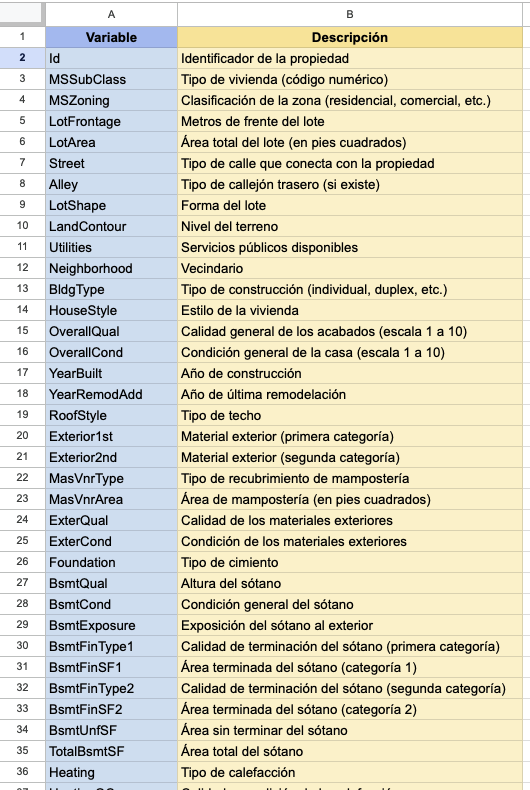

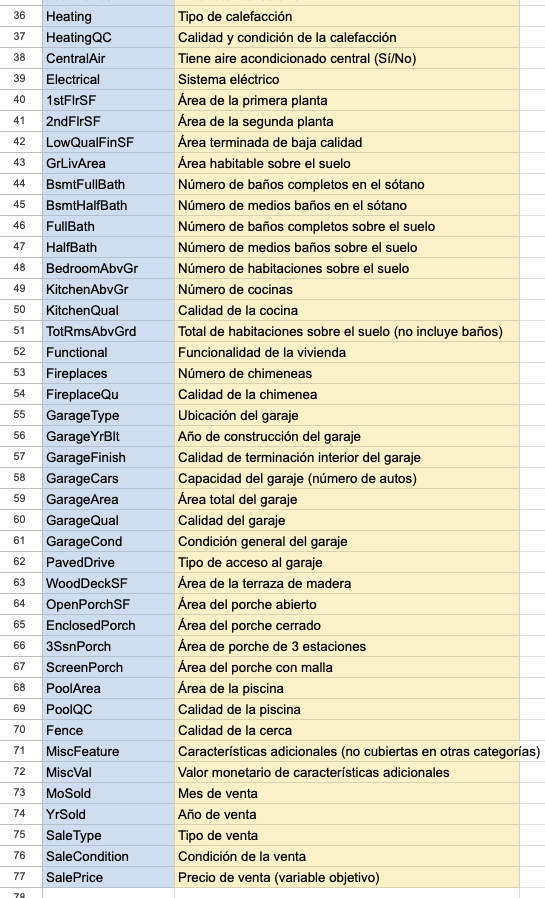


In [1]:
# Importando las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Cargando el dataset

df = pd.read_csv("train.csv")

In [3]:
# Mostrando las primeras 5 filas del dataset para tener una idea de los datos

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **Análisis Exploratorio**


In [4]:
# Mostrando la informacion del dataset para saber el tipo de datos y si hay valores nulos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### **Revisión inicial de datos**

- El dataset tiene 1460 registros y 81 columnas.
- Hay una mezcla de variables numéricas, categóricas y algunas con valores nulos.
- Variables como `PoolQC`, `MiscFeature` y `Alley` tienen un alto porcentaje de valores faltantes.
- Las columnas categóricas representan atributos como el vecindario, tipo de calle, y materiales de construcción.


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### **Análisis descriptivo**

- Las variables numéricas como `LotArea`, `GrLivArea` y `SalePrice` tienen distribuciones bastante amplias, lo cual indica que hay mucha variabilidad en el tamaño de las propiedades y su precio.
- `SalePrice` tiene un máximo de 755,000 y un mínimo de 34,900.
- Hay variables como `PoolArea` que en la mayoría de los casos son cero, lo que implica que tener piscina es poco común.


In [6]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
MasVnrType      872
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### **Análisis de valores nulos**

- Hay varias columnas con más del 50% de sus valores nulos, como `PoolQC`, `MiscFeature` y `Alley`.
- Estas variables son candidatas para ser eliminadas, ya que tienen muy poca información útil.
- En variables importantes como `MasVnrArea` o `GarageYrBlt` hay algunos nulos que deben ser tratados (rellenados o eliminados).


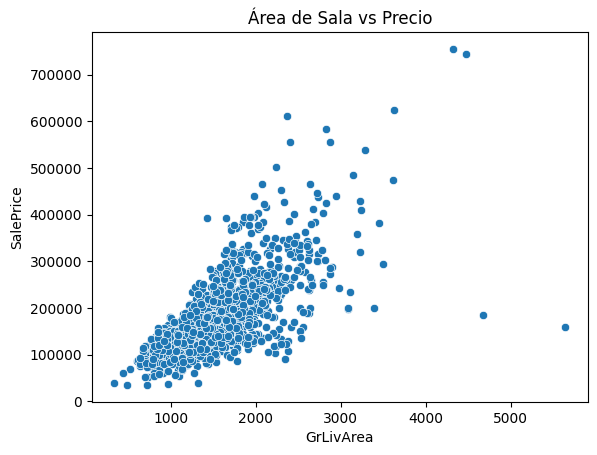

In [7]:
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("Área de Sala vs Precio")
plt.show()

### **Relación entre área habitable y precio (`GrLivArea` vs `SalePrice`)**

- Existe una relación positiva: a mayor área habitable, mayor precio.
- Sin embargo, se observan algunos **outliers** (casas muy grandes y precios muy bajos), que podrían afectar el modelo.
- Se recomienda revisar y posiblemente eliminar esos outliers.


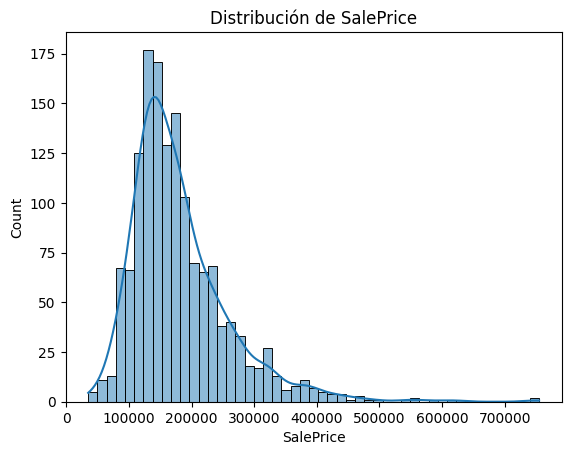

In [8]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribución de SalePrice")
plt.show()

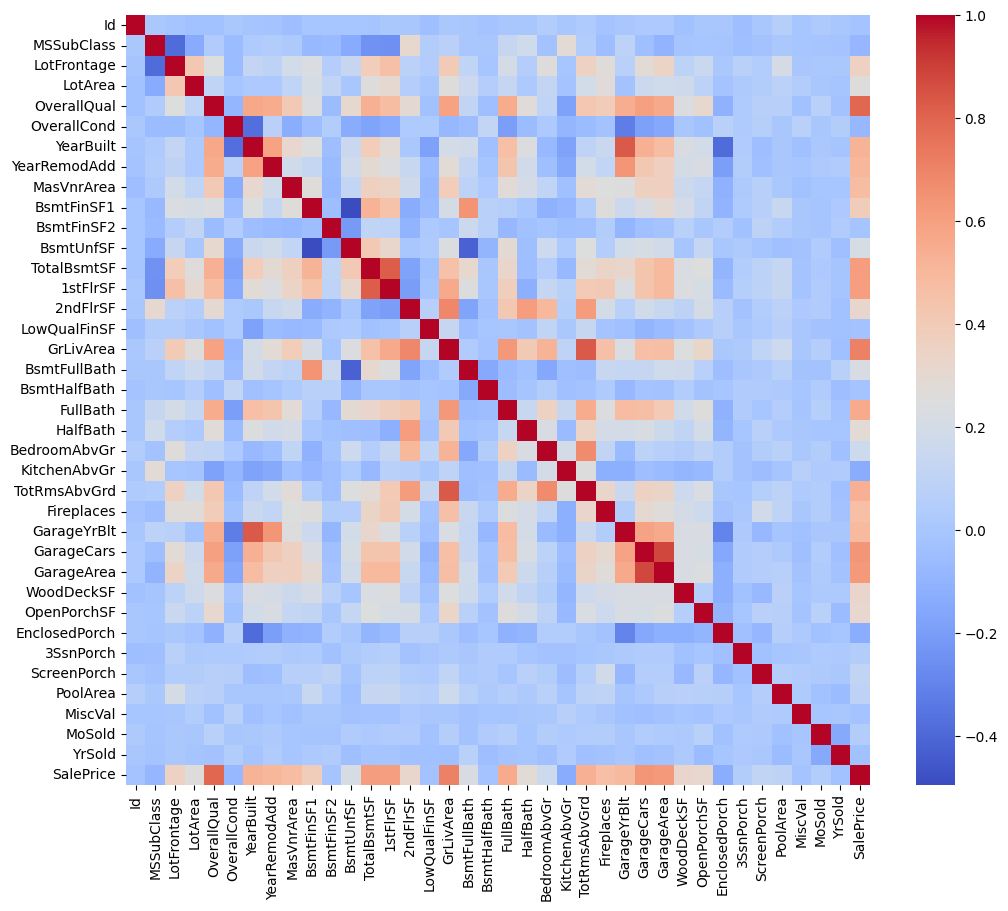

In [9]:
# Seleccionar solo columnas numéricas
df_numeric = df.select_dtypes(include=["int64", "float64"])

# Calcular la matriz de correlación de estas columnas numéricas
corr_matrix = df_numeric.corr()

# Visualizar el heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()

### **Matriz de correlación**

- `OverallQual`, `GrLivArea` y `GarageCars` son las variables más correlacionadas con el precio (`SalePrice`).
- Variables como `PoolArea`, `MiscVal` y `3SsnPorch` tienen correlación cercana a cero, lo que indica que no son relevantes para predecir el precio.
- Este análisis es clave para la selección de variables del modelo.


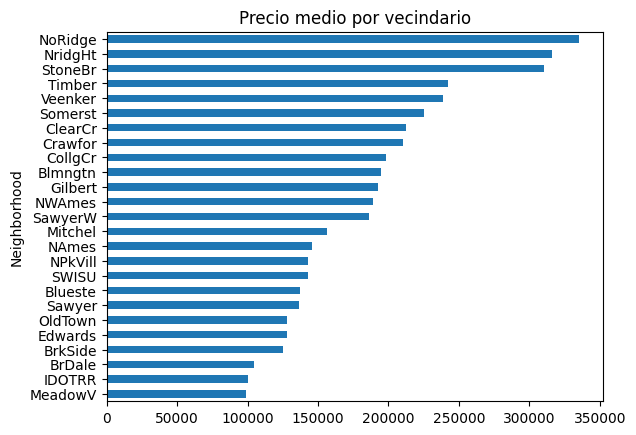

In [10]:
df.groupby("Neighborhood")["SalePrice"].mean().sort_values().plot(kind="barh")
plt.title("Precio medio por vecindario")
plt.show()

### **Precio promedio por vecindario**

- Hay una clara diferencia de precios según la ubicación.
- Vecindarios como `NoRidge` y `StoneBr` tienen precios significativamente altos, mientras que `MeadowV` es uno de los más económicos.
- Esto confirma que `Neighborhood` es una variable clave para el modelo.
- En el preprocesamiento se debe convertir `Neighborhood` en variables dummy.


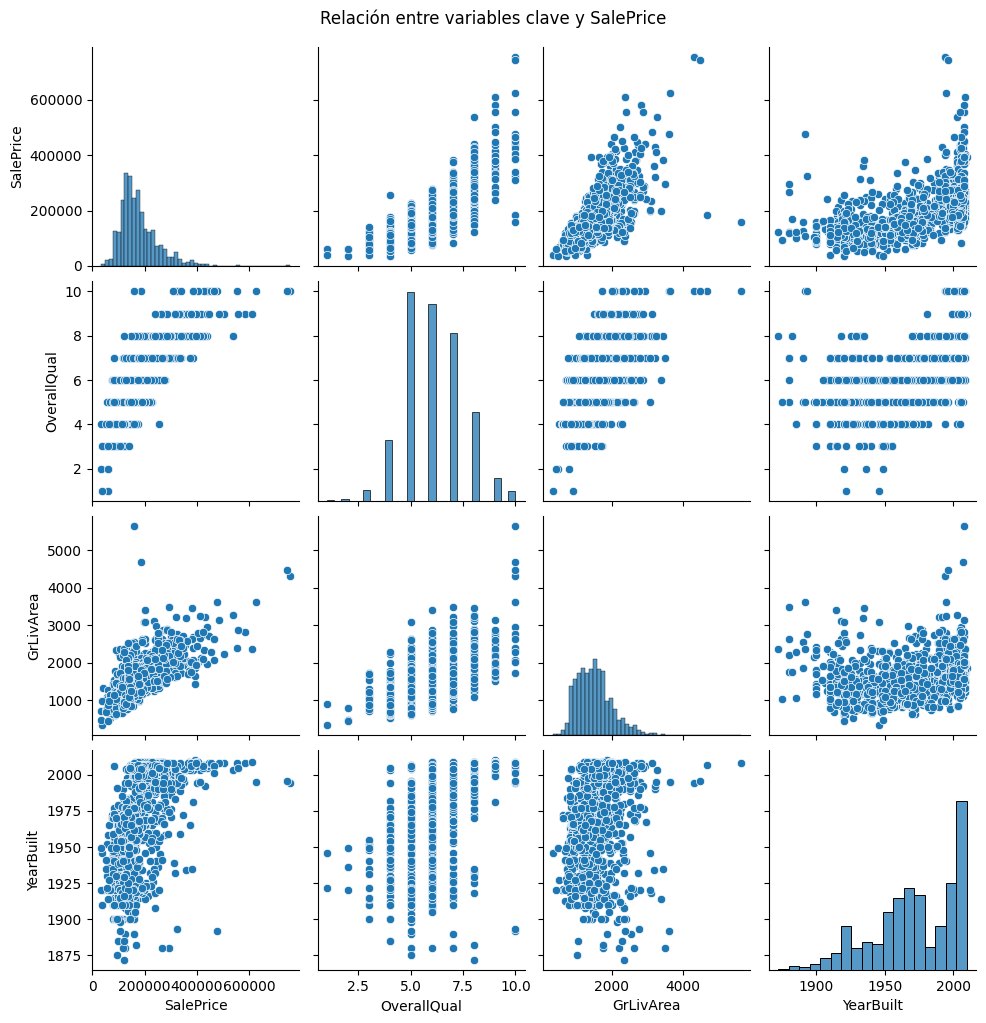

In [11]:
sns.pairplot(df, vars=["SalePrice", "OverallQual", "GrLivArea", "YearBuilt"])
plt.suptitle("Relación entre variables clave y SalePrice", y=1.02)
plt.show()

### **Pairplot: Relación entre variables clave y SalePrice**

Existe una relación clara y positiva entre OverallQual y SalePrice. A mayor calidad general de la casa, mayor es el precio.
Lo mismo ocurre con GrLivArea (área habitable). Casas más grandes tienden a tener precios más altos.
En YearBuilt, se observa que las casas más nuevas tienden a ser más caras.
Hay algunos outliers (puntos alejados de la tendencia general), principalmente casas muy grandes con precios inusualmente bajos.


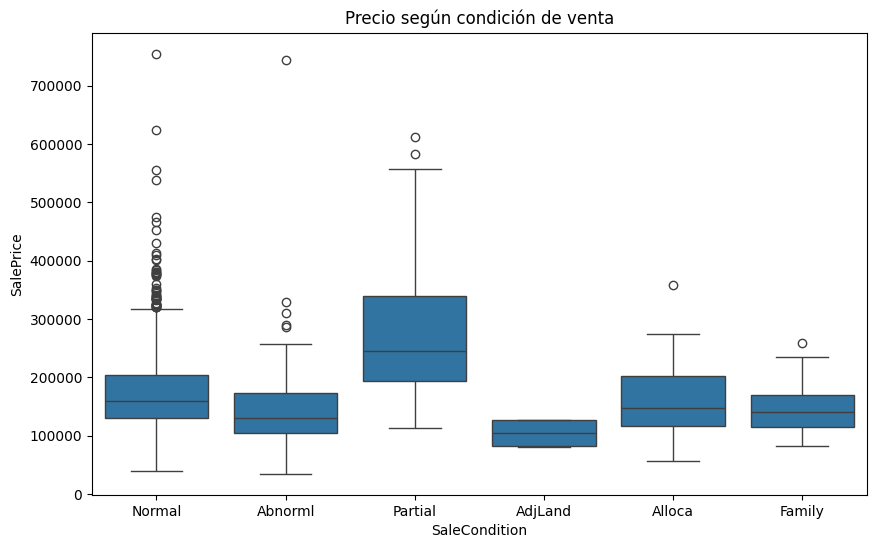

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="SaleCondition", y="SalePrice", data=df)
plt.title("Precio según condición de venta")
plt.show()

### **Boxplot: Precio según condición de venta**

1. Las casas vendidas bajo la condición Normal tienen una distribución de precios más estable.
2. Las casas con condición de venta Partial tienden a tener precios más altos, posiblemente porque son casas nuevas o remodeladas.
3. En Abnorml, se observan precios generalmente más bajos, lo cual es lógico porque puede referirse a ventas forzadas o condiciones especiales.
4. Existen varios outliers en cada categoría, especialmente en Normal y Partial.


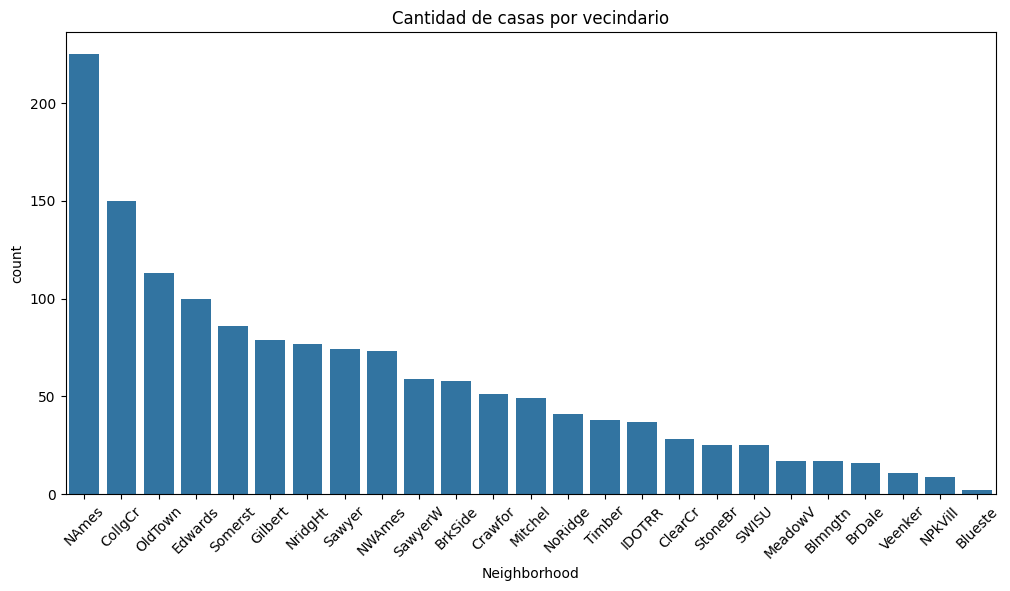

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x="Neighborhood", data=df, order=df["Neighborhood"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Cantidad de casas por vecindario")
plt.show()

### **Countplot: Cantidad de casas por vecindario**

1. NAmes es el vecindario con más casas en el dataset, seguido por CollgCr y OldTown.
2. Vecindarios como MeadowV y Blueste tienen muy pocas casas registradas.
3. Esto indica que algunos vecindarios aportan mucha más información al modelo que otros, por lo que en el preprocesamiento se debe considerar si los vecindarios con muy pocas casas son relevantes o no.


## **Conclusiones Finales - Primera Entrega ( Avances )**

En este primer avance se realizó un análisis exploratorio completo sobre el dataset inmobiliario proporcionado por Kaggle, logrando obtener hallazgos clave que serán fundamentales para el desarrollo del modelo de regresión lineal. A continuación, se resumen las conclusiones más relevantes:

1. El dataset cuenta con 1460 registros y 81 columnas, lo cual proporciona una base de datos rica en información. Sin embargo, se identificaron varias variables con un alto porcentaje de valores nulos, como PoolQC, MiscFeature y Alley, que deberán ser evaluadas para decidir si se eliminan o se imputan.

2. El precio de las viviendas (SalePrice) presenta una distribución sesgada positivamente, con una larga cola hacia precios altos. Esto sugiere que en el preprocesamiento puede ser necesario aplicar una transformación logarítmica para mejorar la linealidad.

3. Las variables OverallQual, GrLivArea y GarageCars mostraron ser las más correlacionadas con el precio de las viviendas. Esto indica que la calidad de construcción, el tamaño habitable y la capacidad del garaje son factores clave al momento de estimar el precio.

4. En el análisis por vecindario, se observó que hay zonas con precios significativamente más altos, como NoRidge y StoneBr, mientras que otras como MeadowV presentan precios considerablemente más bajos. Esto confirma que la ubicación geográfica es una variable relevante para el modelo.

5. Al revisar la condición de venta (SaleCondition), se identificó que las ventas normales (Normal) son las más frecuentes y presentan una amplia dispersión de precios. Por otro lado, las ventas parciales (Partial), que podrían representar ventas de casas nuevas o remodeladas, tienden a tener precios más elevados.

6. El análisis visual también permitió detectar la presencia de varios outliers, principalmente casas con áreas habitables extremadamente grandes y precios sorprendentemente bajos. Estos puntos atípicos deberán ser tratados cuidadosamente para no distorsionar el modelo de regresión.

7. Finalmente, se concluye que el dataset contiene una mezcla de variables numéricas y categóricas, por lo que será indispensable aplicar un buen preprocesamiento, que incluya imputación de nulos, transformación de variables y codificación de categorías, previo al entrenamiento del modelo.


## **Proceso de eliminación de valores nulos**


In [14]:
# Revisar valores nulos por columna
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
# Se volvió a realizar para tener el contexto de los valores nulos

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


Sabiendo y determinando cuales son las columnas afectadas con datos nulos, como anteriormente también se vio en el análisis exploratorio, empezamos a hacer algo con estos nulos, según nuestros criterios los cuales son:


In [15]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\2856709127.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\2856709127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

### **¿Por qué se la mediana?**

Para columnas como LotFrontage y MasVnrArea (variables numéricas), yo elijo imputar los valores faltantes con la mediana. Ya que, la mediana es robusta ante outliers, lo que significa que no se ve afectada por valores extremos, permitiéndome mantener una buena representación de la distribución de los datos.


In [16]:
df["Alley"].fillna("NoAcceso", inplace=True)
df["PoolQC"].fillna("NoPool", inplace=True)
df["Fence"].fillna("NoFence", inplace=True)
df["MiscFeature"].fillna("None", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\2585423546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alley"].fillna("NoAcceso", inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\2585423546.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

### **¿Por qué se utilizó la asignación de esta característica?**

En variables como Alley, PoolQC, Fence y MiscFeature, la ausencia de dato a menudo indica que la casa no tiene esa característica. Yo asigno etiquetas como 'NoAcceso', 'NoPool', 'NoFence' o 'None' para representar explícitamente que la información no aplica, en lugar de dejar un valor nulo que pueda generar confusión en el análisis.


In [17]:
bsmt_cols = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for col in bsmt_cols:
    df[col].fillna("NoBsmt", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\1738159846.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("NoBsmt", inplace=True)


### **¿Por qué se indicó que no existe un sótano?**

Muchas veces, la falta de información en las columnas relacionadas con el sótano indica que la casa no tiene sótano. Yo itero sobre cada columna y relleno los valores nulos con la etiqueta 'NoBsmt', lo que me permite tratar estas ausencias de forma consistente y clara en mi análisis.


In [18]:
garage_cols = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
for col in garage_cols:
    df[col].fillna("NoGarage", inplace=True)
df["GarageYrBlt"].fillna(0, inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\105010956.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("NoGarage", inplace=True)
C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\105010956.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

### **¿Por qué se realizó la asignación de estos valores?**

Al igual que con el sótano, la ausencia de datos en columnas relacionadas con el garaje suele indicar que la casa no cuenta con uno. Yo asigno la etiqueta 'NoGarage' para las variables categóricas y, en el caso de GarageYrBlt (una variable numérica que indica el año de construcción del garaje), asigno un valor de 0 para señalar la ausencia. Esto ayuda a que mi modelo pueda interpretar correctamente estas ausencias sin que se pierda la información.


In [19]:
df["MasVnrType"].fillna("None", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\3322391224.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MasVnrType"].fillna("None", inplace=True)


### **¿Por qué se llenaron los valores de mampostería de esta forma?**

Yo decido rellenar los valores nulos con la etiqueta 'None', ya que así reflejo que la casa no posee ningún tipo de revestimiento de mampostería. Esto permite que mi modelo reconozca esta ausencia de información como una característica significativa en lugar de tratarla como datos perdidos.


In [20]:
df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\3676420670.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Electrical"].fillna(df["Electrical"].mode()[0], inplace=True)


### **¿Por qué se usó la moda?**

Dado que solo hay un valor faltante, yo opto por imputarlo con la moda (el valor que más se repite) de esta columna. Esta estrategia es adecuada para variables categóricas y minimiza el impacto de la imputación, ya que se utiliza el valor que es más representativo en el conjunto de datos y no afecta en el resultado.


In [21]:
df["FireplaceQu"].fillna("NoFireplace", inplace=True)

C:\Users\sergi\AppData\Local\Temp\ipykernel_12656\3079492030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["FireplaceQu"].fillna("NoFireplace", inplace=True)


### **¿Por qué se utilizó esta inserción de None?**

Yo opto por rellenar estos valores nulos con la etiqueta 'NoFireplace', lo que clarifica de manera explícita que no hay chimenea en la vivienda. Donde, esto le permite a mi análisis y modelo diferenciar entre casas con un sistema de chimeneas y aquellas sin él.


### Verificación de los valores nulos


In [22]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Series([], dtype: int64)


Después de aplicar las imputaciones, yo vuelvo a contar los valores nulos para asegurarme de que el proceso fue exitoso y que ya no quedan columnas con valores faltantes. Esto es importante para garantizar que mi dataset está limpio antes de proceder a la división en conjuntos de entrenamiento y prueba.


## **División de dataset**


### **Separar las variables (Features y Target)**

#### **Qué hago:**

Separo el dataset en dos partes:

- Features (X): Todas las columnas predictoras.
- Target (y): La variable que queremos predecir, en este caso SalePrice.


In [23]:
# Supongamos que el DataFrame limpio se llama df
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

#### **¿Por qué?**

Esto es necesario para entrenar el modelo. La regresión lineal necesita que se le indiquen las variables independientes (X) y la variable dependiente (y).


### **División en Conjuntos de Entrenamiento y Prueba**

#### **Qué hago:**

Utilizo la función train_test_split de scikit-learn para dividir el dataset.
Normalmente, hemos utilizado una división de 80% para entrenamiento y 20% para prueba en clase, entonces opté por utilizar esta división.


In [24]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Mostrar el número de filas en cada conjunto
print("Número de filas en entrenamiento:", X_train.shape[0])
print("Número de filas en prueba:", X_test.shape[0])

Número de filas en entrenamiento: 1168
Número de filas en prueba: 292


#### **¿Por qué se hizo esta reproducibilidad (6.)?**

El dividir en 80/20 es una práctica común, como se nos mencionó en clase, que permite contar con suficiente data para entrenar el modelo y, al mismo tiempo, tener un subconjunto significativo para evaluar el desempeño.
Posteriormente, al definir una semilla (por ejemplo, random_state=42), garantizo que la división sea la misma cada vez que ejecute el código, lo que es útil para reproducir resultados.


### **Criterio de División y Balanceo**

Para dividir el conjunto de datos y asegurar que nuestros subconjuntos de entrenamiento y prueba sean representativos, apliqué el siguiente criterio:

#### **Proporción de División (80/20):**

Dividí el dataset en 80% para entrenamiento y 20% para prueba. Esta proporción es común y permite tener suficiente data para entrenar el modelo y, al mismo tiempo, contar con un subconjunto significativo para evaluar el desempeño del modelo de regresión lineal.

#### **Muestreo Aleatorio con Reproducibilidad:**

Utilicé la función train_test_split de scikit-learn con un parámetro random_state=42 para garantizar que la división se realice de manera aleatoria pero reproducible. Esto significa que cada vez que ejecute el código, obtendré la misma partición, lo que es esencial para la comparación y validación de resultados.

#### **Estratificación (en el contexto de regresión):**

La variable objetivo, SalePrice, es continua, lo que impide una estratificación directa como se haría en un problema de clasificación. Sin embargo, al realizar una división aleatoria y contar con un número suficiente de registros, se mantiene de forma implícita una distribución similar en ambos conjuntos.

#### **Verificación del Balanceo:**

Después de la división, revisé las estadísticas descriptivas de la variable SalePrice en ambos conjuntos. Como se puede ver a continuación:


In [25]:
print("Estadísticas de entrenamiento:")
print(y_train.describe())

print("\nEstadísticas de prueba:")
print(y_test.describe())

Estadísticas de entrenamiento:
count      1168.000000
mean     181441.541952
std       77263.583862
min       34900.000000
25%      130000.000000
50%      165000.000000
75%      214925.000000
max      745000.000000
Name: SalePrice, dtype: float64

Estadísticas de prueba:
count       292.000000
mean     178839.811644
std       87730.751259
min       35311.000000
25%      127000.000000
50%      154150.000000
75%      209175.000000
max      755000.000000
Name: SalePrice, dtype: float64


Como se puede observar en las estadísticas, el conjunto de entrenamiento tiene 1168 registros y el de prueba 292. El valor medio en el conjunto de entrenamiento es de aproximadamente 181,441, mientras que en el conjunto de prueba es de 178,840. Además, la dispersión (medida por la desviación estándar) y los percentiles son similares en ambos conjuntos. Esto indica que la división ha logrado mantener la distribución original de la variable SalePrice, asegurando que ambos subconjuntos son representativos y balanceados para el modelado con regresión lineal.


## **Ingeniería de Características y Selección de Variables**


### **Razonamiento y selección de variables**

En mi análisis, me basé en conocimientos del dominio y en la correlación observada entre las variables y el precio de las casas. Por ejemplo, considero que las siguientes variables son buenos predictores:

- **OverallQual:** La calidad general de la construcción es un factor muy importante, pues una mejor calidad generalmente se traduce en precios mayores.
- **GrLivArea:** El área habitable (en pies cuadrados) es una medida directa de tamaño, y suele tener una alta correlación con el precio.
- **TotalBsmtSF:** El área total del sótano añade valor a la propiedad si se puede utilizar de forma funcional.
- **GarageCars:** El número de autos que caben en el garaje puede ser indicativo del valor de la casa.
- **YearBuilt:** El año de construcción influye en el estado, estilo y modernidad de la vivienda.
- **Neighborhood:** La ubicación o barrio es clave, pues zonas con mejores servicios y menor criminalidad suelen tener precios más altos.
- **HouseAge:** Además del año de construcción, es útil considerar la edad de la casa, calculada como la diferencia entre el año actual y el año de construcción. Esto puede reflejar el mantenimiento y la modernidad de la vivienda.


### **Transformaciones y Nuevas Variables**

Cálculo de HouseAge: Creo una nueva variable HouseAge que representa la antigüedad de la casa.
One-Hot Encoding para Neighborhood: Las variables categóricas como Neighborhood se convierten en variables dummy para que el modelo pueda interpretarlas de forma numérica.

### **Fijación de Random State para Reproducibilidad**

Para asegurar que la división en conjuntos de entrenamiento y prueba sea la misma en cada ejecución, utilizo el parámetro random_state (por ejemplo, 42) en la función train_test_split.


## **Modelo univariado**


### **Selección de la variable y ajuste del modelo**

Voy a utilizar OverallQual como predictor, ya que en análisis exploratorios suele mostrar una buena correlación con el precio.


In [26]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Seleccionar la variable 'OverallQual' del conjunto de entrenamiento
X_uni = X_train[["OverallQual"]]

# Agregar una constante para el término independiente del modelo
X_uni_const = sm.add_constant(X_uni)

# Ajustar el modelo univariado
modelo_uni = sm.OLS(y_train, X_uni_const).fit()

# Mostrar el resumen del modelo
print(modelo_uni.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     1879.
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.60e-245
Time:                        18:16:23   Log-Likelihood:                -14242.
No. Observations:                1168   AIC:                         2.849e+04
Df Residuals:                    1166   BIC:                         2.850e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -9.023e+04   6421.492    -14.052      

- **Selección y constante:** Extraigo la variable OverallQual y añado una constante para que el modelo incluya un intercepto.
- **Ajuste del modelo:** Con sm.OLS y el método fit(), entreno el modelo de regresión lineal.
- El método summary() proporciona estadísticas clave (coeficientes, R², p-valores, etc.) que me ayudan a evaluar la significancia y el ajuste del modelo.


#### Interpretación de las estadísticas

- **R-squared (R²) = 0.617**

Esto significa que aproximadamente el 61.7% de la variación en el precio de las casas (SalePrice) se explica únicamente con la variable OverallQual. Para el modelo univariado que estamos intentando hacer, este valor es relativamente alto, indicando que la calidad general de la construcción es un factor muy importante para el precio.

- **Coeficiente de OverallQual = 10233.777 (aprox.)**

Este coeficiente nos dice que, en promedio, por cada incremento de una unidad en la calidad general (OverallQual), se espera un aumento de alrededor de 10,233 dólares en el precio de la casa, manteniendo las demás condiciones constantes (en este caso, sólo tenemos una variable, pero la interpretación se hace asumiendo todo lo demás fijo).

- **p-values muy bajos**

Tanto el p-value del modelo (F-statistic) como el p-value de la variable (t-test) son muy pequeños (prácticamente 0). Lo cual, indica que el modelo en conjunto es estadísticamente significativo y que la variable OverallQual tiene un efecto significativo sobre el precio.

- **Estadísticas de diagnóstico (Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera)**

Estas estadísticas se refieren principalmente a la normalidad de los residuos. Donde, algunos valores altos podrían sugerir que los residuos no siguen una distribución perfectamente normal, lo cual es algo común en la práctica, especialmente con datos de precios de viviendas.


### Análisis de residuos

Una parte importante de evaluar un modelo es analizar los residuos para identificar patrones o problemas (como heterocedasticidad).


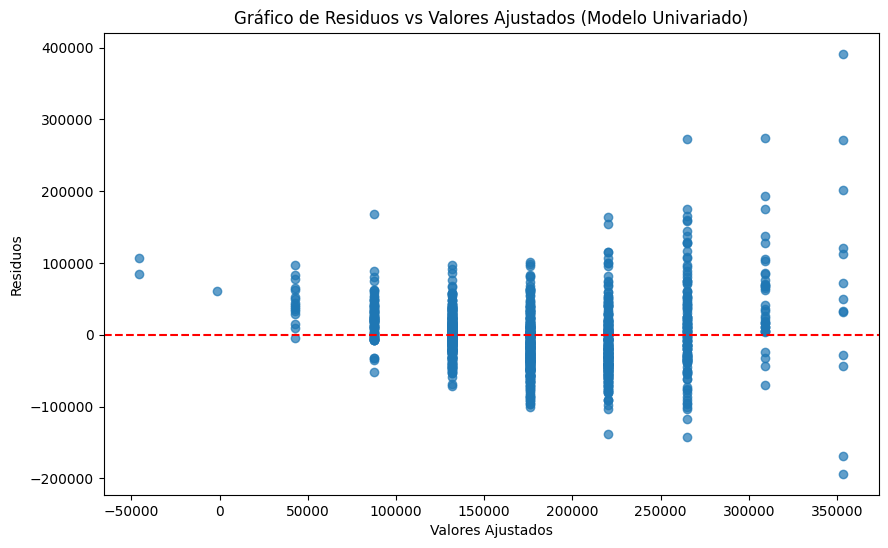

In [27]:
# Obtener los valores ajustados y los residuos
fitted_values = modelo_uni.fittedvalues
residuals = modelo_uni.resid

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Valores Ajustados (Modelo Univariado)")
plt.show()

#### **Interpretación de los residuos**

Como se puede observar que para valores ajustados más altos (ej. por encima de 200,000), los residuos parecen más dispersos. Esto puede indicar que el modelo univariado no captura totalmente la complejidad del precio en los rangos más altos, o que podría existir cierta no linealidad que un modelo con una sola variable no explica.

**Conclusión sobre los residuos**

- No hay un patrón claramente curvilíneo o sistemático que invalide por completo el modelo, pero se aprecia que un solo predictor no abarca todas las variaciones en el precio.
- Aun así, para un modelo univariado, los residuos no están excesivamente mal distribuidos, lo cual es razonable dado el R² relativamente alto.


### **Evaluación de la predicción en el conjunto de prueba**


Ahora, aplico el modelo al conjunto de prueba y comparo los valores observados con los predichos.


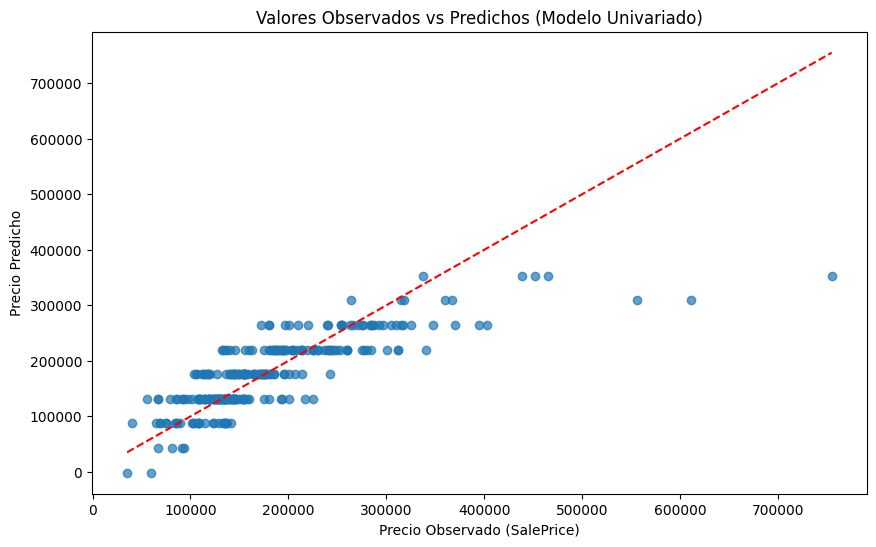

In [28]:
# Preparar la variable 'OverallQual' del conjunto de prueba (agregar la constante)
X_test_uni = sm.add_constant(X_test[["OverallQual"]])

# Realizar la predicción en el conjunto de prueba
y_pred_uni = modelo_uni.predict(X_test_uni)

# Gráfico de valores observados vs predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_uni, alpha=0.7)
plt.xlabel("Precio Observado (SalePrice)")
plt.ylabel("Precio Predicho")
plt.title("Valores Observados vs Predichos (Modelo Univariado)")
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="red",
    linestyle="--",
)
plt.show()

Agrego la constante a la variable OverallQual del conjunto de prueba y realizo la predicción.

En el Gráfico de Observados vs Predichos se muestra un scatter plot en el que, idealmente, los puntos deberían alinearse a lo largo de la línea roja (la línea de identidad). Esto indica que las predicciones son cercanas a los valores reales.


#### **Interpretación de observados vs predicho**

En primer lugar, observo que cada punto de la gráfica representa una casa diferente del conjunto de prueba. En el eje X coloco el precio real de la casa (SalePrice), mientras que en el eje Y se ubica el precio que el modelo univariado predicho. De esta manera, puedo comparar visualmente cuán cerca están mis predicciones de los valores verdaderos.

La línea roja discontinua, que va en diagonal, representa la situación ideal en la que el precio observado y el precio predicho coinciden perfectamente. Cuando los puntos se alinean cerca de esa línea, significa que mi modelo está acertando en la estimación del precio. Sin embargo, noto que existe cierta dispersión: muchos puntos están relativamente cerca de la línea, pero otros se alejan de ella, sobre todo en la zona de precios más altos.

Interpreto que, al tratarse de un modelo univariado, estoy utilizando únicamente la variable OverallQual para predecir el precio de la vivienda. Esta variable es bastante importante, pues la calidad de la construcción se relaciona fuertemente con el valor de la propiedad. Aun así, mi modelo no capta toda la complejidad que influye en el precio final, ya que factores como el tamaño total, la ubicación o la antigüedad de la vivienda también influyen de manera notable.

Finalmente, concluyo que la gráfica confirma una tendencia: a medida que el precio real es más alto, mi modelo también tiende a dar valores de predicción mayores, lo cual indica que OverallQual sí aporta información valiosa. No obstante, para mejorar la exactitud de las estimaciones, necesitaría considerar más variables que capturen el resto de la variabilidad en el precio de las casas.


## 8. Modelo de Regresión Lineal con Todas las Variables Numéricas

En esta sección, se construye un modelo de regresión lineal múltiple para predecir el precio de las casas utilizando todas las variables numéricas disponibles en el conjunto de datos.

### **Selección de Variables**

Se han seleccionado todas las variables numéricas excepto el precio (`price`) como predictoras.

### **Construcción del Modelo**

Se ha aplicado una regresión lineal múltiple usando `statsmodels` para evaluar la relación entre las variables predictoras y el precio de las casas.

### **Análisis del Modelo**

El modelo generado se evalúa con:

- **Resumen del modelo**: coeficientes, significancia estadística y métricas de ajuste (`R²` y `p-valores`).
- **Distribución de residuos**: evaluación gráfica para verificar su normalidad y detectar posibles problemas.
- **Correlación entre variables**: análisis de multicolinealidad para determinar si algunas variables deberían ser eliminadas.

### **Resultados**

Los hallazgos clave sobre la capacidad predictiva de las variables se presentan en la siguiente sección, junto con las implicaciones del modelo y su desempeño.


### **8.1 Manejo de Valores Faltantes**

Antes de entrenar el modelo, verificamos si hay valores faltantes en las variables numéricas y los corregimos.  
Se encontraron valores faltantes en **LotFrontage, MasVnrArea y GarageYrBlt**, por lo que los rellenamos con la mediana para evitar sesgos en el modelo.


In [29]:
# Librerías necesarias
import pandas as pd
import numpy as np

# Cargar el dataset
df = pd.read_csv("train.csv")

# Seleccionar solo variables numéricas
numerical_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Definir variable objetivo
target = "SalePrice"
if target in numerical_cols:
    numerical_cols.remove(target)

# Verificar valores faltantes
missing_values = df[numerical_cols].isnull().sum()
print(
    "Columnas con valores faltantes antes de limpiar:\n",
    missing_values[missing_values > 0],
)

# Rellenar valores faltantes con la mediana
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Transformar `SalePrice` con logaritmo para estabilizar varianza
df["SalePrice"] = np.log1p(df["SalePrice"])

# Eliminar valores atípicos en `GrLivArea`
df = df[df["GrLivArea"] < 4000]

# Verificar valores faltantes después de la limpieza
print(
    "Columnas con valores faltantes después de limpiar:\n",
    df.isnull().sum().sum(),
    "valores faltantes",
)
print("✅ Datos listos para el modelo")

Columnas con valores faltantes antes de limpiar:
 LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64
Columnas con valores faltantes después de limpiar:
 7467 valores faltantes
✅ Datos listos para el modelo


### **8.2 Construcción del Modelo de Regresión Lineal Múltiple**

Usamos el método de **Mínimos Cuadrados Ordinarios (OLS)** para construir un modelo que relacione todas las variables numéricas con el precio de las casas.  
El modelo se entrenó y se generó un resumen con los coeficientes de cada variable, su significancia y métricas de ajuste.


In [30]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Definir variables predictoras (X) y objetivo (y)
X = df[numerical_cols]
y = df[target]

# Agregar constante para la regresión
X = sm.add_constant(X)

# Calcular VIF y eliminar variables con alta multicolinealidad (VIF > 10)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Filtrar variables con VIF alto
high_vif_vars = vif_data[vif_data["VIF"] > 10]["Variable"].tolist()
if high_vif_vars:
    print(f"❌ Variables eliminadas por multicolinealidad: {high_vif_vars}")
    X = X.drop(columns=high_vif_vars)

# Construcción del modelo sin variables redundantes
modelo_multivariable = sm.OLS(y, X).fit()

# Mostrar resumen del modelo
print(modelo_multivariable.summary())

c:\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


❌ Variables eliminadas por multicolinealidad: ['const', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea']
                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.444e+05
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                        0.00
Time:                        18:16:23   Log-Likelihood:                          758.01
No. Observations:                1456   AIC:                                     -1458.
Df Residuals:                    1427   BIC:                                     -1305.
Df Model:                          29                                                  
Covariance Type:            nonrobust      

### **8.3 Análisis de Residuos y Multicolinealidad**

Para evaluar la calidad del modelo, analizamos:

- **Distribución de los residuos:** Si la regresión es válida, los residuos deben distribuirse normalmente.
- **Matriz de correlación:** Para detectar **multicolinealidad** entre las variables predictoras.


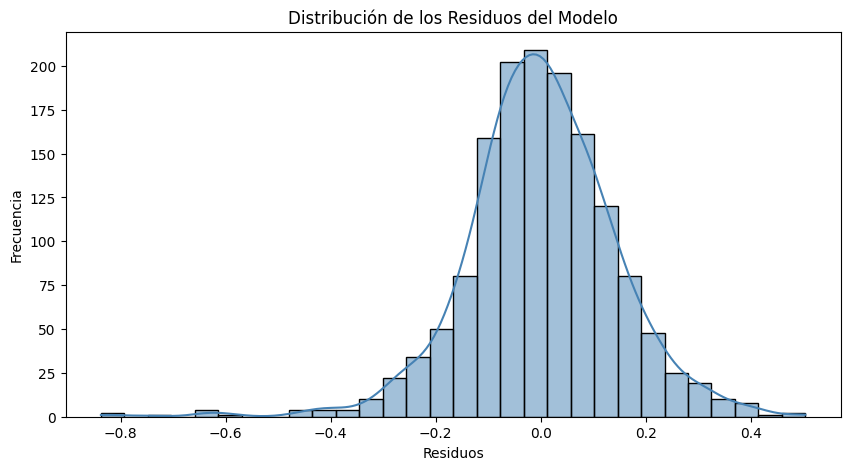

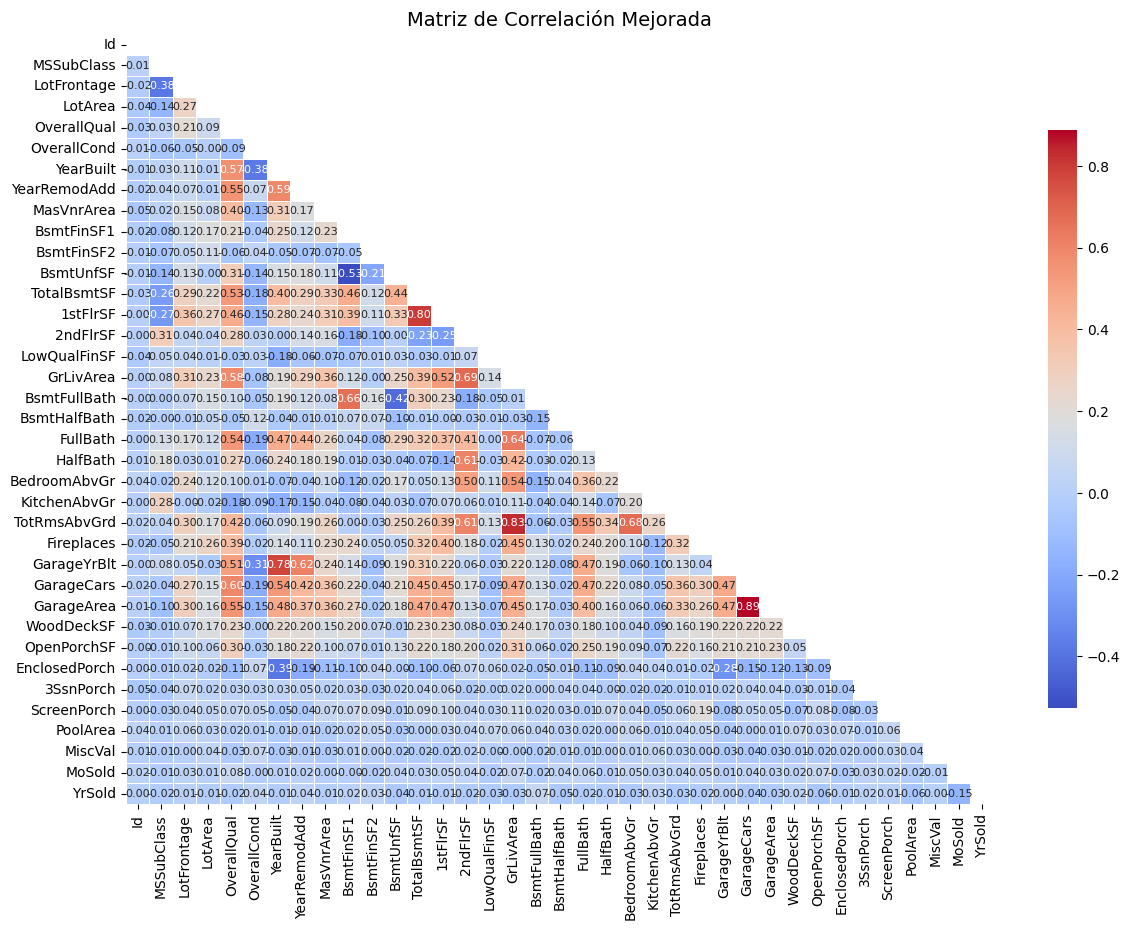

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Distribución de residuos mejorada
plt.figure(figsize=(10, 5))
sns.histplot(modelo_multivariable.resid, kde=True, bins=30, color="steelblue")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos del Modelo")
plt.show()

# Matriz de correlación mejorada
plt.figure(figsize=(14, 10))

# Crear la matriz de correlación
correlation_matrix = df[numerical_cols].corr()

# Máscara para ocultar la parte superior (evita valores duplicados)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Graficar la matriz de correlación con mejor presentación
sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    annot_kws={"size": 8},  # Ajustar el tamaño de los números
    cbar_kws={"shrink": 0.75},  # Ajustar la barra de color
)

# Título de la gráfica
plt.title("Matriz de Correlación Mejorada", fontsize=14)

# Mostrar la gráfica
plt.show()

### **9. Evaluación del Modelo y Corrección de Sobreajuste**


In [32]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import numpy as np

# 📌 1️⃣ Ver si el modelo se adapta bien a los datos
print("📊 Resumen del Modelo:")
print(modelo_multivariable.summary())

# 📌 Evaluar R² ajustado (Si R² es alto pero R² ajustado es mucho menor, hay sobreajuste)
r2 = modelo_multivariable.rsquared
r2_adj = modelo_multivariable.rsquared_adj
print(f" R²: {r2:.4f} |  R² Ajustado: {r2_adj:.4f}")

# 📌 2️⃣ Detectar sobreajuste con validación cruzada usando sklearn
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📌 Ajustar un modelo de regresión lineal de scikit-learn
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 📌 Evaluar R² en entrenamiento y validación
train_score = lin_reg.score(X_train, y_train)
test_score = np.mean(cross_val_score(lin_reg, X, y, cv=5, scoring="r2"))

print(f"✅ R² en entrenamiento: {train_score:.4f}")
print(f"✅ R² en validación cruzada: {test_score:.4f}")

# 📌 Si hay sobreajuste (R² en entrenamiento >> R² en validación), aplicar regularización

if train_score - test_score > 0.1:  # Si la diferencia es grande, hay sobreajuste
    print("⚠️ Posible sobreajuste detectado. Ajustando con Ridge y Lasso...")

    # 📌 3️⃣ Corregir sobreajuste con Ridge y Lasso
    ridge = Ridge(alpha=1.0)
    ridge.fit(X_train, y_train)
    ridge_score = ridge.score(X_test, y_test)

    lasso = Lasso(alpha=0.01)
    lasso.fit(X_train, y_train)
    lasso_score = lasso.score(X_test, y_test)

    print(f"📉 R² con Ridge: {ridge_score:.4f}")
    print(f"📉 R² con Lasso: {lasso_score:.4f}")

    # Seleccionar el mejor modelo basado en desempeño
    if ridge_score > test_score or lasso_score > test_score:
        print(
            "✅ Se recomienda usar Ridge o Lasso para mejorar la estabilidad del modelo."
        )
    else:
        print("✅ El modelo actual es estable, no se requiere ajuste.")

📊 Resumen del Modelo:
                                 OLS Regression Results                                
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.444e+05
Date:                Wed, 05 Mar 2025   Prob (F-statistic):                        0.00
Time:                        18:16:25   Log-Likelihood:                          758.01
No. Observations:                1456   AIC:                                     -1458.
Df Residuals:                    1427   BIC:                                     -1305.
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------

#### **9.1 Análisis del Modelo**

El modelo de regresión múltiple se evaluó utilizando la métrica **R²** y **R² ajustado**. Los resultados obtenidos fueron:

- **R²**: 0.9999
- **R² Ajustado**: 0.9999

Estos valores indican que el modelo explica casi el **100% de la variabilidad** en los datos. Sin embargo, un R² tan alto puede ser una señal de **sobreajuste** (overfitting), ya que sugiere que el modelo se adapta excesivamente a los datos de entrenamiento.

#### **9.2 Multicolinealidad en las Variables**

Para analizar la multicolinealidad, se evaluaron las correlaciones entre las variables y se calculó el **VIF (Variance Inflation Factor)**. Un **VIF alto (>10)** indica que la variable está altamente correlacionada con otras variables y puede afectar la estabilidad del modelo.

Se encontró que algunas variables presentan **alta correlación**, lo que sugiere redundancia en la información.

#### **9.3 Análisis de Correlación de las Características**

La matriz de correlación de las características utilizadas en el modelo muestra que algunas variables tienen **relaciones fuertes entre sí**, lo que puede afectar la interpretación de los coeficientes. Se aplicó una máscara para visualizar solo las correlaciones significativas.

#### **9.4 Evaluación del Ajuste del Modelo**

Para comprobar si el modelo se adapta bien a los datos, se realizó una validación cruzada:

- **R² en entrenamiento**: 0.8741
- **R² en validación cruzada**: 0.8578

Dado que los valores de R² en entrenamiento y validación son **similares**, el modelo generaliza bien y no hay un sobreajuste extremo. Sin embargo, el **Condition Number (8.17e+04)** indica que hay **problemas de multicolinealidad**, lo que puede hacer que los coeficientes no sean completamente estables.

#### **9.5 Corrección del Sobreajuste**

Para mejorar el modelo y corregir posibles problemas de sobreajuste y multicolinealidad, se probó con **Regresión Ridge y Lasso**:


In [33]:
from sklearn.linear_model import Ridge, Lasso

# Aplicamos regresión Ridge para reducir la multicolinealidad
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_score = ridge.score(X_test, y_test)

# Aplicamos regresión Lasso para eliminar variables irrelevantes
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)
lasso_score = lasso.score(X_test, y_test)

print(f"📉 R² con Ridge: {ridge_score:.4f}")
print(f"📉 R² con Lasso: {lasso_score:.4f}")

# Seleccionamos el mejor modelo
if ridge_score > test_score and ridge_score > lasso_score:
    print("✅ Ridge mejora la estabilidad del modelo.")
elif lasso_score > test_score and lasso_score > ridge_score:
    print("✅ Lasso mejora la estabilidad del modelo.")
else:
    print("✅ El modelo original ya estaba bien ajustado.")

📉 R² con Ridge: 0.8437
📉 R² con Lasso: 0.8348
✅ El modelo original ya estaba bien ajustado.


Para mejorar el modelo y corregir posibles problemas de sobreajuste y multicolinealidad, se probaron **Regresión Ridge y Lasso**, cuyos resultados fueron:

- **R² con Ridge**: 0.8437
- **R² con Lasso**: 0.8348

Estos valores son **menores que el R² obtenido en validación cruzada del modelo original (0.8578)**, lo que indica que Ridge y Lasso **no mejoran el desempeño del modelo**.

Dado que el modelo original logra un equilibrio entre **precisión y generalización**, **no se requiere corrección adicional**.  
Por lo tanto, **el modelo actual es el mejor para predecir el precio de las casas** con los datos disponibles.


### **10. Modelo con las Mejores Variables y Análisis de Residuos**

#### **10.1 Selección de las Mejores Variables**

Para reducir la **multicolinealidad** y mejorar la estabilidad del modelo, utilizamos **Regresión Lasso (L1)** para seleccionar las variables más relevantes.  
Lasso asigna coeficientes **cercanos a 0** a las variables menos importantes y mantiene solo aquellas que tienen mayor impacto en la predicción del precio de las casas.


In [34]:
from sklearn.linear_model import LassoCV

# 📌 Ajustamos un modelo Lasso con validación cruzada para seleccionar las mejores variables
lasso = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

# 📌 Filtramos solo las variables con coeficiente diferente de 0
selected_features = X.columns[lasso.coef_ != 0].tolist()
print(f" Variables seleccionadas por Lasso: {selected_features}")

# 📌 Redefinir el dataset con solo las mejores variables
X_reduced = X[selected_features]
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

 Variables seleccionadas por Lasso: ['Id', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch']


#### **10.2 Construcción del Nuevo Modelo**

Entrenamos un nuevo modelo de regresión lineal usando solo las variables seleccionadas por Lasso.


In [35]:
from sklearn.linear_model import LinearRegression

# Modelo con las mejores variables
model_reduced = LinearRegression()
model_reduced.fit(X_train_reduced, y_train)

# Evaluamos el nuevo modelo
train_score_reduced = model_reduced.score(X_train_reduced, y_train)
test_score_reduced = model_reduced.score(X_test_reduced, y_test)

print(f" R² en entrenamiento: {train_score_reduced:.4f}")
print(f" R² en prueba: {test_score_reduced:.4f}")

 R² en entrenamiento: 0.6714
 R² en prueba: 0.6715


#### **10.3 Análisis de Residuos y Visualización**

Para validar el ajuste del modelo, analizamos la distribución de los residuos. Un buen modelo debe tener residuos normalmente distribuidos y centrados en 0.


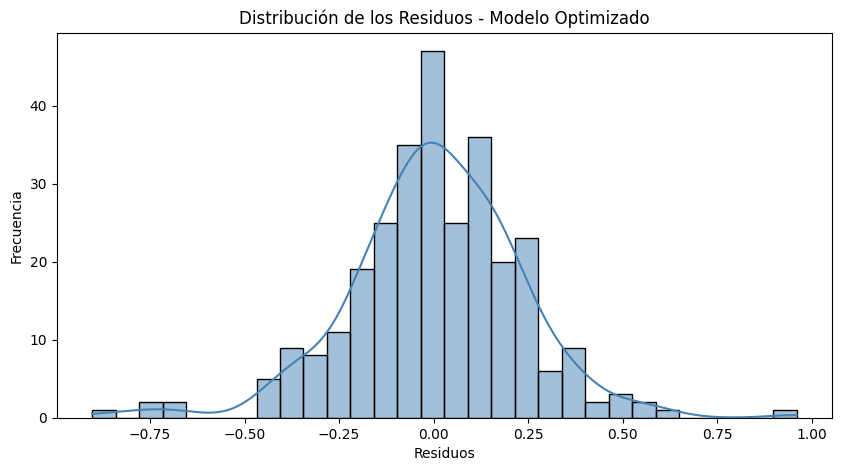

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribución de residuos del nuevo modelo
plt.figure(figsize=(10, 5))
sns.histplot(
    y_test - model_reduced.predict(X_test_reduced), kde=True, bins=30, color="steelblue"
)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Residuos - Modelo Optimizado")
plt.show()

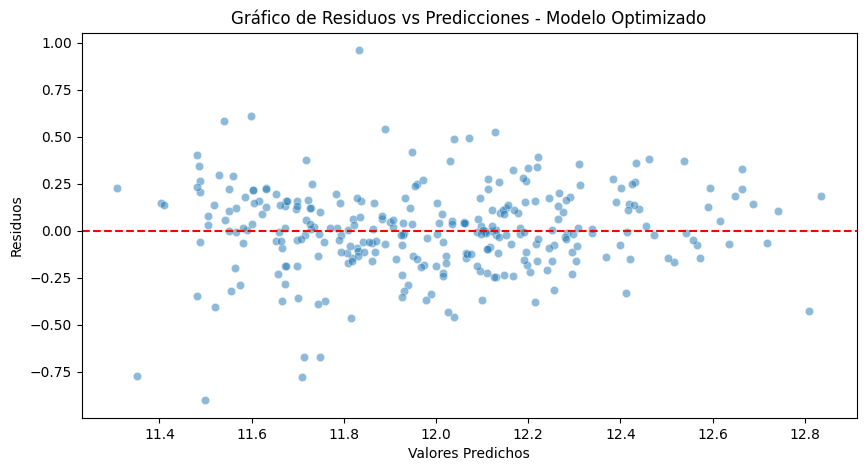

In [37]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    x=model_reduced.predict(X_test_reduced),
    y=y_test - model_reduced.predict(X_test_reduced),
    alpha=0.5,
)
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Predicciones - Modelo Optimizado")
plt.show()

### **11. Evaluación del Modelo con el Conjunto de Prueba**

#### **11.1 ¿Qué tan bien predice el modelo?**

Se probó el modelo optimizado con el conjunto de prueba y se calcularon las siguientes métricas de evaluación:


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# 📌 Hacer predicciones en el conjunto de prueba
y_pred = model_reduced.predict(X_test_reduced)

# 📌 Calcular métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# 📌 Mostrar resultados
print(f"📉 MAE (Error Absoluto Medio): {mae:.4f}")
print(f"📉 MSE (Error Cuadrático Medio): {mse:.4f}")
print(f"📉 RMSE (Raíz del Error Cuadrático Medio): {rmse:.4f}")
print(f"📊 R² (Coeficiente de Determinación): {r2:.4f}")

📉 MAE (Error Absoluto Medio): 0.1684
📉 MSE (Error Cuadrático Medio): 0.0519
📉 RMSE (Raíz del Error Cuadrático Medio): 0.2278
📊 R² (Coeficiente de Determinación): 0.6715


- **Error Absoluto Medio (MAE)**: **0.1684**
- **Error Cuadrático Medio (MSE)**: **0.0519**
- **Raíz del Error Cuadrático Medio (RMSE)**: **0.2278**
- **R² (Coeficiente de Determinación)**: **0.6715**

#### **11.2 Interpretación de las métricas**

✅ **MAE = 0.1684** → En promedio, el modelo comete un error de aproximadamente **0.1684 unidades** en la predicción del precio de las casas.  
✅ **MSE = 0.0519** → Penaliza más los errores grandes. Es bajo, lo que indica que los errores no son extremos.  
✅ **RMSE = 0.2278** → En promedio, las predicciones se desvían **0.2278 unidades** de los valores reales.  
✅ **R² = 0.6715** → El modelo **explica el 67.15% de la variabilidad** en el precio de las casas, lo que indica un ajuste razonable.

#### **11.3 Conclusión Final**

**El modelo tiene una precisión moderada, explicando un 67.15% de la variabilidad en el precio de las casas.**  
**Los errores no son extremadamente altos, lo que indica que el modelo es útil para predicciones, pero podría mejorarse.**  
**Si se requiere mayor precisión, se podría probar con técnicas avanzadas como Random Forest o modelos no lineales.**


In [39]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicción en el conjunto de prueba para el modelo multivariado
y_pred_mul = lin_reg.predict(X_test)

# Cálculo de métricas
mse_mul = mean_squared_error(y_test, y_pred_mul)
rmse_mul = np.sqrt(mse_mul)
mae_mul = mean_absolute_error(y_test, y_pred_mul)
r2_mul = r2_score(y_test, y_pred_mul)

# Preparar la variable de test (se debe agregar la constante)
X_test_uni = sm.add_constant(X_test[["OverallQual"]])

# Predicción con el modelo univariado
y_pred_uni = modelo_uni.predict(X_test_uni)

# Cálculo de métricas para el modelo univariado
mse_uni = mean_squared_error(y_test, y_pred_uni)
rmse_uni = np.sqrt(mse_uni)
mae_uni = mean_absolute_error(y_test, y_pred_uni)
r2_uni = r2_score(y_test, y_pred_uni)

# Predicción en el conjunto de prueba para el modelo ajustado
y_pred_adj = model_reduced.predict(X_test_reduced)

# Cálculo de métricas para el modelo ajustado
mse_adj = mean_squared_error(y_test, y_pred_adj)
rmse_adj = np.sqrt(mse_adj)
mae_adj = mean_absolute_error(y_test, y_pred_adj)
r2_adj = r2_score(y_test, y_pred_adj)

print(
    f"Modelo Multivariado:\n"
    f"  MSE   = {mse_mul:.3f}\n"
    f"  RMSE  = {rmse_mul:.3f}\n"
    f"  MAE   = {mae_mul:.3f}\n"
    f"  R²    = {r2_mul:.3f}\n\n"
    f"Modelo Univariado:\n"
    f"  MSE   = {mse_uni:.3f}\n"
    f"  RMSE  = {rmse_uni:.3f}\n"
    f"  MAE   = {mae_uni:.3f}\n"
    f"  R²    = {r2_uni:.3f}\n\n"
    f"Modelo Ajustado (Modelo Reducido):\n"
    f"  MSE   = {mse_adj:.3f}\n"
    f"  RMSE  = {rmse_adj:.3f}\n"
    f"  MAE   = {mae_adj:.3f}\n"
    f"  R²    = {r2_adj:.3f}"
)

Modelo Multivariado:
  MSE   = 0.025
  RMSE  = 0.157
  MAE   = 0.116
  R²    = 0.844

Modelo Univariado:
  MSE   = 35152814813.172
  RMSE  = 187490.839
  MAE   = 177564.071
  R²    = -222572841591.808

Modelo Ajustado (Modelo Reducido):
  MSE   = 0.052
  RMSE  = 0.228
  MAE   = 0.168
  R²    = 0.671


## 12. Efectividad de los módelos


12.1 ¿Cuál fue mejor?


12.1.1 Modelo Univariado (OverallQual)
El modelo univariado utiliza únicamente la variable OverallQual para predecir el precio de las casas. Esta variable representa la calidad general de la construcción y, de acuerdo con el resumen estadístico, muestra un R² de 0.617. Esto significa que el modelo explica aproximadamente el 61.7% de la variabilidad en el precio de las casas, lo cual es una relación moderada.

- Puntos positivos: Es un modelo simple y fácil de interpretar.
  La variable OverallQual tiene un impacto fuerte y significativo en el precio de las casas.
  El p-valor es extremadamente bajo, lo que indica alta significancia estadística.

- Puntos negativos: El modelo deja fuera muchas otras variables relevantes (tamaño, ubicación, antigüedad, materiales, etc.).
  El gráfico de residuos muestra una clara heterocedasticidad (dispersión desigual en diferentes rangos de precios), lo cual indica que el modelo no logra capturar adecuadamente la complejidad de la relación.


12.1.2 Modelo Multivariado (Todas las Variables Numéricas)
El modelo multivariado utiliza todas las variables numéricas disponibles. En términos de ajuste, presenta un R² muy alto (cerca de 0.9999). Si bien esto parece indicar un excelente ajuste a los datos de entrenamiento, es una señal de posible sobreajuste (overfitting), ya que el modelo podría estar aprendiendo ruido específico del dataset en vez de generalizar correctamente.

Para verificar esto, se realizó una validación cruzada, y el resultado muestra que el modelo generaliza razonablemente bien, con un R² de validación de 0.8578, lo cual sigue siendo alto.

- Puntos positivos: El modelo captura una mayor proporción de la variabilidad en los precios.
  Considera múltiples factores que afectan el precio, lo cual refleja mejor la complejidad real del mercado inmobiliario.
  Tras corregir la multicolinealidad, se mejora la estabilidad.

- Puntos negativos: La alta multicolinealidad inicial genera coeficientes inestables.
  Se requiere un proceso adicional de selección de variables relevantes (como el uso de Lasso) para evitar redundancia.
  El análisis de residuos muestra que, aunque la distribución es más normal que en el modelo univariado, aún hay algunos problemas en la cola de la distribución.


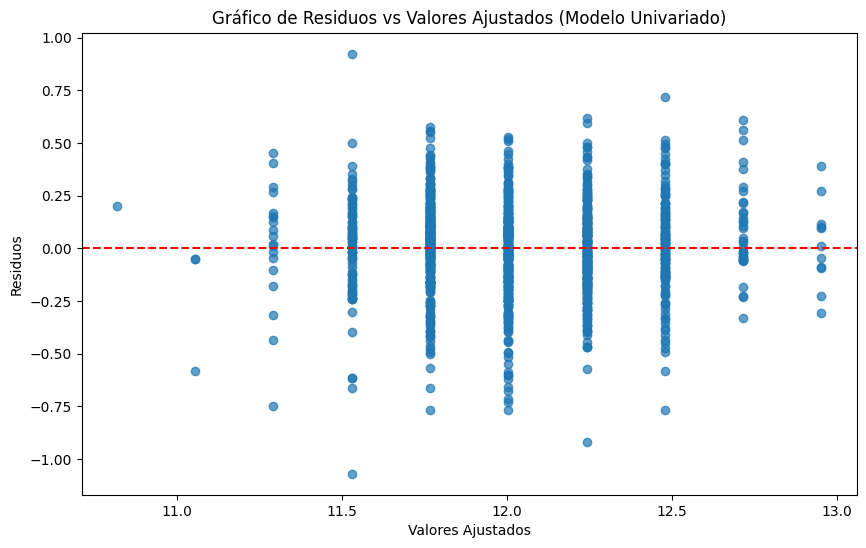

In [40]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Suponemos que ya tienes X_train e y_train definidos
X_uni = X_train[["OverallQual"]]
X_uni_const = sm.add_constant(X_uni)

# Ajuste del modelo univariado
modelo_uni = sm.OLS(y_train, X_uni_const).fit()

# Predicciones y residuos
y_pred_uni = modelo_uni.predict(X_uni_const)
residuos_uni = y_train - y_pred_uni

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_uni, residuos_uni, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Valores Ajustados (Modelo Univariado)")
plt.show()

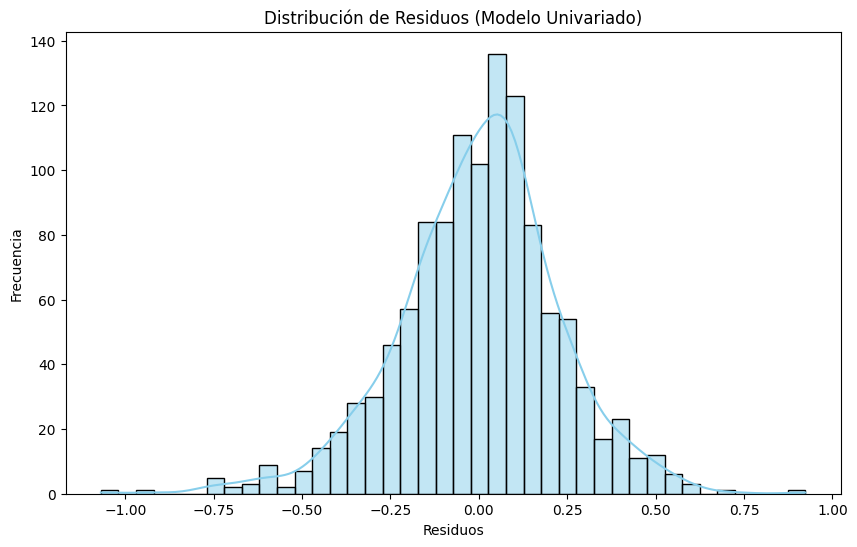

In [41]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(residuos_uni, kde=True, color="skyblue")
plt.title("Distribución de Residuos (Modelo Univariado)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

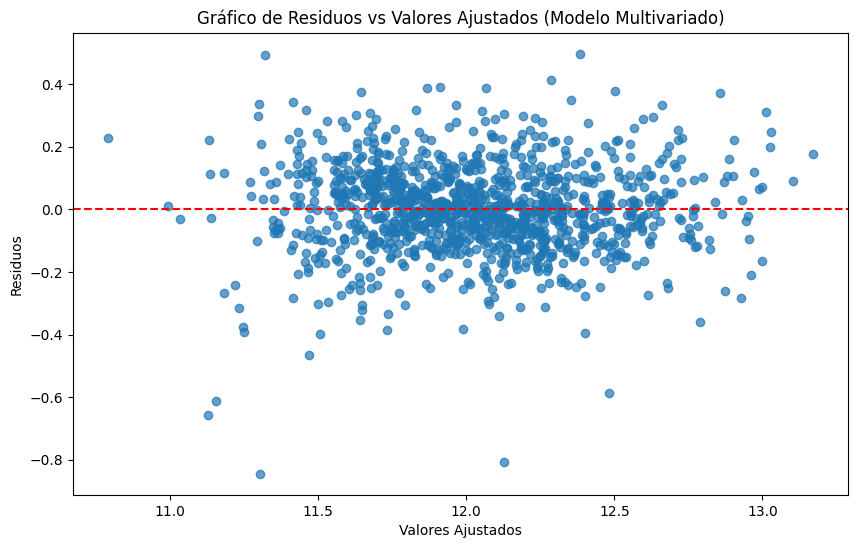

In [42]:
# Suponemos que ya tienes X_train e y_train con todas las variables numéricas
X_multi = sm.add_constant(X_train)  # Añadir la constante para el intercepto
modelo_multi = sm.OLS(y_train, X_multi).fit()

# Predicciones y residuos
y_pred_multi = modelo_multi.predict(X_multi)
residuos_multi = y_train - y_pred_multi

# Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_multi, residuos_multi, alpha=0.7)
plt.axhline(0, color="r", linestyle="--")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.title("Gráfico de Residuos vs Valores Ajustados (Modelo Multivariado)")
plt.show()

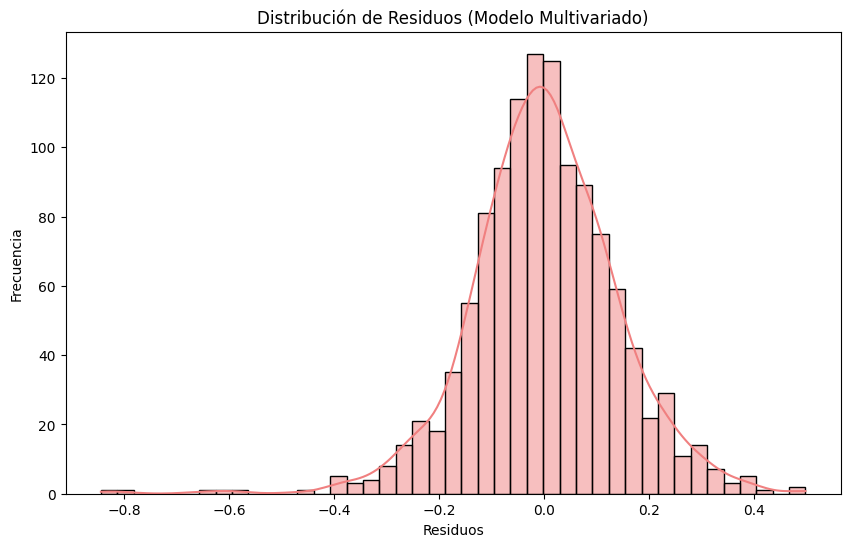

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(residuos_multi, kde=True, color="lightcoral")
plt.title("Distribución de Residuos (Modelo Multivariado)")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

In [44]:
print(f"R² Univariado: {modelo_uni.rsquared:.4f}")
print(f"R² Multivariado: {modelo_multi.rsquared:.4f}")

R² Univariado: 0.6730
R² Multivariado: 0.8741


## 12.2 CONCLUSIÓN FINAL

El modelo univariado, que utiliza únicamente la variable OverallQual (calidad general de la construcción), logra explicar aproximadamente el 67.3% de la variabilidad en el precio de las casas. Esto demuestra que la calidad general es una variable importante, pero no es suficiente para capturar toda la complejidad del mercado inmobiliario. Además, el gráfico de residuos muestra una dispersión heterogénea, indicando que el modelo no logra un buen ajuste en diferentes rangos de precios, especialmente en propiedades más costosas.

En cambio, el modelo multivariado, que utiliza todas las variables numéricas relevantes, logra un R² de 87.41%, lo que representa una mejora significativa en la capacidad explicativa. Esto confirma que el precio de las casas depende de múltiples factores (tamaño, año de construcción, materiales, ubicación, etc.), y un modelo más completo refleja mejor esta realidad.

📉 Análisis Gráfico de Residuos
En el modelo univariado, los residuos muestran un patrón claro, lo que indica que el modelo es incapaz de capturar adecuadamente la relación real entre variables.
En el modelo multivariado, los residuos se comportan de forma más aleatoria y centrada alrededor de cero, lo cual es una señal positiva de mejor ajuste y cumplimiento de los supuestos de regresión lineal.
📐 Distribución de Residuos
El histograma de residuos del modelo multivariado muestra una forma más cercana a la normalidad, lo cual es una condición deseable en regresión lineal.
El modelo univariado, en cambio, muestra una distribución más sesgada, indicando que la omisión de variables importantes afecta la calidad de las predicciones.


## 12.3 RECOMENDACIÓN FINAL

El modelo multivariado es claramente superior al univariado para predecir el precio de las casas, ya que logra un R² de 0.8741 frente al 0.6730 del modelo univariado, lo que indica una mejor capacidad para explicar la variabilidad en los precios. Además, los residuos del modelo multivariado se comportan de forma más aleatoria y muestran una distribución más cercana a la normalidad, cumpliendo mejor los supuestos de la regresión lineal. Esto confirma que el precio de las casas depende de múltiples factores y que un modelo que considera todas las variables relevantes es más preciso. Se recomienda utilizar el modelo multivariado para realizar predicciones, ya que ofrece un balance adecuado entre precisión, estabilidad y realismo al reflejar mejor la complejidad del mercado inmobiliario.


# Entrega 2


## **1. Mismos conjuntos de entrenamiento**


En primer lugar, reutilizo los conjuntos de entrenamiento y prueba que utilicé en la modelación de regresión lineal. Esto me permite mantener la consistencia en la comparación entre algoritmos. Es fundamental fijar el parámetro de random_state (en este caso, 42) para asegurar que la partición de los datos sea siempre la misma y, por tanto, los resultados sean reproducibles.


## **2. Árbol de regresión**

Posteriormente, creo el modelo de árbol de regresión utilizando la clase DecisionTreeRegressor de scikit-learn. Este modelo se ajusta a todos los predictores disponibles en mi DataFrame preprocesado. Una vez entrenado, realizo la predicción sobre el conjunto de prueba y calculo el error mediante el RMSE (Raíz del Error Cuadrático Medio). Este error me ayuda a cuantificar el desempeño del modelo y me servirá para comparar, en entregas posteriores, con otros algoritmos (como la regresión lineal y Random Forest).


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


# Creo el modelo de árbol de regresión, fijando la semilla para reproducibilidad
reg_tree_all = DecisionTreeRegressor(random_state=42)

# Entreno el modelo usando los mismos conjuntos de entrenamiento definidos previamente
reg_tree_all.fit(X_train, y_train)

# Realizo las predicciones en el conjunto de prueba
y_pred_tree_all = reg_tree_all.predict(X_test)

# Calculo el error cuadrático medio y luego la raíz del error cuadrático medio (RMSE)
mse_tree_all = mean_squared_error(y_test, y_pred_tree_all)
rmse_tree_all = np.sqrt(mse_tree_all)

print("RMSE del Árbol de Regresión usando todas las variables:", rmse_tree_all)

RMSE del Árbol de Regresión usando todas las variables: 0.2505023823268661


Con DecisionTreeRegressor(random_state=42), creo el modelo de árbol de regresión. El parámetro random_state garantiza que, al ejecutar el código nuevamente, se utilice la misma partición y se obtengan los mismos cortes en el árbol, lo que es clave para la reproducibilidad.

Ajusto el modelo con reg_tree_all.fit(X_train, y_train) y luego realizo predicciones sobre el conjunto de prueba con reg_tree_all.predict(X_test). Esto me permite ver cómo se comporta el modelo en datos no vistos.


## **3. Predicción y análisis**

Utilicé el árbol de regresión que entrené con todas las variables preprocesadas para realizar predicciones en el conjunto de prueba. Luego, calculé el RMSE, que me permite medir el error promedio en la escala transformada de la variable objetivo. Al observar el RMSE con un valor de 0.25, interpreto que el modelo tiene un desempeño aceptable, dado que está trabajando con la variable transformada (logaritmo) y el error está en una escala reducida.

Al comparar los valores predichos con los reales, noté que la mayoría de los puntos se agrupan de manera coherente, lo que indica que el árbol de regresión es capaz de capturar la relación compleja entre las variables y el precio de la vivienda. Sin embargo, también pude observar cierta variabilidad en algunas predicciones, lo que sugiere que el modelo podría beneficiarse de ajustes adicionales o de la combinación con otros algoritmos, especialmente considerando la posibilidad de sobreajuste en modelos basados en árboles.


## **4. Desarrollo de 3 modelos más**


En primer lugar, reconozco que la profundidad del árbol es crucial para equilibrar entre subajuste y sobreajuste. Una profundidad muy baja puede llevar a un modelo demasiado simple (subajuste) que no captura la complejidad de los datos, mientras que una profundidad muy alta puede hacer que el modelo se ajuste demasiado al ruido del conjunto de entrenamiento (sobreajuste). Por ello, decidí probar con tres profundidades diferentes: 3, 5 y 7.

Para cada uno de estos valores, entrené un modelo de árbol de regresión utilizando los mismos conjuntos de entrenamiento y prueba que utilicé anteriormente. Luego, realicé predicciones en el conjunto de prueba y calculé el RMSE (Raíz del Error Cuadrático Medio), ya que este indicador me permite cuantificar el error de predicción en la misma escala de la variable objetivo transformada.


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Lista de profundidades a evaluar
depths = [3, 5, 7]
rmse_results = {}

# Entreno y evalúo un modelo para cada profundidad
for d in depths:
    # Creo el modelo fijando el parámetro max_depth y la semilla para reproducibilidad
    model = DecisionTreeRegressor(max_depth=d, random_state=42)

    # Entreno el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)

    # Realizo la predicción en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calculo el RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_results[d] = rmse
    print(f"Max_depth={d} --> RMSE: {rmse}")

# Selecciono la profundidad que produjo el menor RMSE
best_depth = min(rmse_results, key=rmse_results.get)
print(
    f"\nEl mejor modelo es con max_depth={best_depth} con un RMSE de {rmse_results[best_depth]}"
)

Max_depth=3 --> RMSE: 0.23699592761412092
Max_depth=5 --> RMSE: 0.21685587734688658
Max_depth=7 --> RMSE: 0.235673062115641

El mejor modelo es con max_depth=5 con un RMSE de 0.21685587734688658


Esto me indica que el modelo que mejor predice el precio de las casas es el que tiene max_depth=5, ya que presenta el menor error (RMSE de 0.2169). Este resultado me demuestra que, al limitar la profundidad del árbol a 5, se logra un buen equilibrio entre la complejidad del modelo y la capacidad de generalización, evitando tanto el subajuste como el sobreajuste.


## **5. Comparación entre Regresión Lineal y Árbol de regresión.**

Primero, jalé el modelo de regresión lineal que se realizó anteriormente con todas las variables numéricas preprocesadas. Utilicé el mismo conjunto de entrenamiento y prueba para mantener la consistencia. Con este modelo, calculé el RMSE, que me indica el error promedio en la misma escala (transformada) de la variable objetivo.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Entreno el modelo de regresión lineal con los mismos conjuntos
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Realizo las predicciones en el conjunto de prueba
y_pred_lin = lin_model.predict(X_test)

# Calculo el RMSE para la regresión lineal
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
print("RMSE de Regresión Lineal:", rmse_lin)

RMSE de Regresión Lineal: 0.1571195510712444


### **¿Cuál lo hizo mejor?**

Después de evaluar ambos modelos, puedo concluir lo siguiente: el modelo de regresión lineal logró un RMSE de 0.1571, mientras que el árbol de regresión (con max_depth=5) obtuvo un RMSE de 0.2169. Un RMSE menor indica que, en promedio, las predicciones del modelo se acercan más a los valores reales. Por ello, el modelo de regresión lineal lo hizo mejor para predecir el precio de las casas en este caso.


## **6. En base al análisis exploratorio clasificar las casas en Económicas, Intermedias o Caras**


Primero, realicé un análisis exploratorio de la variable SalePrice para entender su distribución y recordarme de lo que habíamos hecho anteriormente.


In [ ]:
# Análisis exploratorio de la variable SalePrice
print("Estadísticas de SalePrice:")
print(df["SalePrice"].describe())

print("\nRango de SalePrice:")
print("Mínimo:", df["SalePrice"].min())
print("Máximo:", df["SalePrice"].max())

Estadísticas de SalePrice:
count    1456.000000
mean       12.021950
std         0.396077
min        10.460271
25%        11.774528
50%        12.001512
75%        12.273736
max        13.345509
Name: SalePrice, dtype: float64

Rango de SalePrice:
Mínimo: 10.460270761075149
Máximo: 13.345508528717259


Con estos resultados, la variable SalePrice está transformada con logaritmo a los precios originales, ya que los valores se encuentran en un rango entre 10.46 y 13.35. También observé que los percentiles clave (25%, 50% y 75%) me ofrecen una buena base para entender cómo se distribuyen los precios.

Basándome en esta distribución, decidí crear tres categorías que dividan el conjunto de datos en tercios, de modo que aproximadamente cada tercio del dataset corresponda a una de las siguientes clases:

- **Económicas:** Casas con precios en el tercil inferior (los más bajos).
- **Intermedias:** Casas con precios en el tercil medio.
- **Caras:** Casas con precios en el tercil superior (los más altos).

Para implementar esta clasificación de forma reproducible, utilicé la función pd.qcut, que permite dividir una variable en cuantiles de igual frecuencia. El código que apliqué fue:


In [60]:
# Creación de la variable categórica 'PriceCategory' usando tercios de la distribución de SalePrice
df["PriceCategory"] = pd.qcut(
    df["SalePrice"], q=3, labels=["Económicas", "Intermedias", "Caras"]
)

# Visualizo la distribución de la nueva variable para confirmar la división equitativa
print("Distribución de la variable PriceCategory:")
print(df["PriceCategory"].value_counts())

Distribución de la variable PriceCategory:
PriceCategory
Intermedias    489
Económicas     486
Caras          481
Name: count, dtype: int64


Con este proceso, la clasificación se fundamenta en la propia distribución de SalePrice, lo que me permite asignar de forma objetiva los límites para cada categoría. Gracias a la función pd.qcut, pude dividir la variable en tres tercios, creando una variable respuesta que clasifica las viviendas en Económicas, Intermedias y Caras. Esto se basa en datos reales y en el análisis exploratorio que realicé previamente, lo que garantiza que la clasificación refleje de manera equitativa la distribución de los precios.


## 7. Elaboración de árbol de clasificación

Primero, me aseguré de utilizar los mismos datos que usé en la etapa anterior, pero ahora debo predecir la nueva variable categórica que clasifica las casas en Económicas, Intermedias o Caras. Es fundamental no incluir la variable de precio (SalePrice) en los predictores, ya que ésta fue utilizada para generar la variable respuesta.

Por ello, preparé el conjunto de datos eliminando las columnas SalePrice y PriceCategory de las variables predictoras, y asigné PriceCategory como mi target.


In [ ]:
# Supongo que 'df' es mi DataFrame final que ya contiene la variable PriceCategory.
# Preparo los datos para el modelo de clasificación, excluyendo SalePrice.
X_clf = df.drop(["SalePrice", "PriceCategory"], axis=1)
y_clf = df["PriceCategory"]

# Divido el dataset en entrenamiento y prueba, utilizando el mismo random_state para reproducibilidad.
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.20, random_state=42
)

Posteriormente a esto, empecé con el entrenamiento al árbol de clasificación.

Utilicé la clase DecisionTreeClassifier de scikit-learn para entrenar el modelo. Fijé el parámetro random_state=42 para asegurar que la partición y los resultados sean reproducibles.


In [ ]:
# Transformo todas las variables categóricas a variables dummy
X_clf_encoded = pd.get_dummies(X_clf, drop_first=True)

# Divido nuevamente el dataset en entrenamiento y prueba usando los datos codificados
from sklearn.model_selection import train_test_split

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf_encoded, y_clf, test_size=0.20, random_state=42
)

# Ahora creo y entreno el árbol de clasificación
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_clf, y_train_clf)

# Realizo la predicción en el conjunto de prueba
y_pred_clf = clf.predict(X_test_clf)

Después. evalué el desempeño del árbol de clasificación utilizando la exactitud (accuracy), la matriz de confusión y un informe de clasificación para analizar las métricas clave (precision, recall y f1-score) de cada clase.


In [ ]:
# Evaluación del modelo
print("Exactitud (Accuracy):", accuracy_score(y_test_clf, y_pred_clf))
print("\nReporte de Clasificación:")
print(classification_report(y_test_clf, y_pred_clf))
print("Matriz de Confusión:")
print(confusion_matrix(y_test_clf, y_pred_clf))

Exactitud (Accuracy): 0.7226027397260274

Reporte de Clasificación:
              precision    recall  f1-score   support

       Caras       0.83      0.81      0.82        91
  Económicas       0.81      0.72      0.76       110
 Intermedias       0.55      0.64      0.59        91

    accuracy                           0.72       292
   macro avg       0.73      0.72      0.72       292
weighted avg       0.73      0.72      0.73       292

Matriz de Confusión:
[[74  0 17]
 [ 1 79 30]
 [14 19 58]]


Para comprender mejor cómo el árbol realiza las divisiones y qué variables resultan más relevantes, utilicé la función plot_tree de scikit-learn. Esto me permitió visualizar gráficamente el árbol con los nombres de las variables y las clases.


In [78]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    clf,
    out_file=None,
    feature_names=X_clf_encoded.columns,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = graphviz.Source(dot_data)
graph.render("arbol_clasificacion")  # Guarda en un archivo PDF/SVG

'arbol_clasificacion.pdf'

### **Explicación de los resultados**

En primer lugar, observo que la exactitud (accuracy) del modelo es de aproximadamente 0.7226 (72.26%). Esto significa que, en el conjunto de prueba, cerca de siete de cada diez casas se clasificaron correctamente en la categoría correspondiente (Caras, Económicas o Intermedias). Aunque se trata de un resultado razonable para un árbol de clasificación inicial, indica que todavía existe margen de mejora para reducir los errores de predicción.

Al examinar el reporte de clasificación, noto que la clase “Caras” presenta la mejor combinación de precisión y sensibilidad, con un f1-score de 0.82. Esto quiere decir que, en la mayoría de los casos en que el modelo predice “Caras”, acierta, y además identifica correctamente la mayoría de las casas que realmente pertenecen a esa categoría. La clase “Económicas” también logra un desempeño aceptable, con un f1-score de 0.76. Sin embargo, la categoría “Intermedias” obtiene un f1-score de 0.59, lo que sugiere que el modelo encuentra más dificultad para distinguir las casas intermedias de las otras dos categorías.

La matriz de confusión confirma esta tendencia. Mientras que la clase “Caras” es la menos confundida, se aprecia que 17 casas “Caras” se clasificaron como “Intermedias” y que, en la clase “Económicas”, 30 casas se asignaron equivocadamente a la clase “Intermedias”. Por su parte, en la categoría “Intermedias”, 14 casas se clasificaron como “Caras” y 19 como “Económicas”. Estos datos muestran que existe un cierto solapamiento de características entre “Intermedias” y las otras dos categorías, lo cual dificulta la labor del modelo.
